# TP3

Daniel Francisco Texeira Andrade - A100057

Pedro André Ferreira Malainho - A100050

----

# Problema 2

## Enunciado

----

Relativo ao progrma do problema anterior,

a. Construa um "Control Flow Autommaton (CFA)" que determina este programa. Identifique os locais e as transições/ramos. Numa <u>abordagem orientada às pré-condições</u> identifique os transformadores de predicados associados ao vários locais e os "switches" associados aos vários ramos.

b. Construa em ```Z3``` o sistema de equações que representa o comportamento deste sistema dinâmico sob o ponto de vista da prova de segurança e verifique a segurança do programa através da resolução total ou parcial deste sistema.
    
Sugere-se, na alínea (a), uma representação do CFA atráves de um grafo orientado implementado em ```networkx``` e a sua compilação para o sistema de equações.


## Implementação

----

<div class="alert alert-block alert-success" style="color: #495057; background-color: #e2e6ea; border-color: #bcc0c4;">
    <b>
        INPUT  a, b <br>
        assume  a > 0 and b > 0 <br>
        r, r', s, s', t, t' = a, b, 1, 0, 0, 1 <br>
        while r' != 0 <br>
            q = r div r' <br>
            r, r', s, s', t, t' = r', r − q × r', s', s − q × s', t', t − q × t' <br>
        OUTPUT r, s, t <br>
    </b>
</div>

<div class="alert alert-block alert-success">
    <b>
        Este programa implementa o algoritmo estendido de Euclides (EXA) para dois inteiros constantes 
        \(a, b \geq 0\) e com precisão limitada a \(n\) bits (fornecido como parâmetro do programa). 
        Por outro lado, o diagrama descreve a mesma funcionalidade através de um grafo orientado, 
        que é interpretado da forma seguinte:
    </b>
    <ul>
        <li>
            Os <b>nodos</b> do grafo representam <i>locais</i> (ou ações) que atuam sobre os "inputs" 
            do nodo e produzem um "output" executando as operações indicadas. 
            A cada nodo está associado um identificador único. Existe um nodo sem antecedentes.
        </li>
        <li>
            Os <b>ramos</b> do grafo representam <i>switches</i> (ou ligações) que transferem o "output" 
            de um nodo para o "input" do nodo seguinte. Esta transferência é condicionada pela satisfação 
            de uma <i>condição</i>, associada ao ramo, calculada como o valor que a ligação transfere. 
            Adicionalmente:
            <ul>
                <li>Numa ligação, a ausência de condição é equivalente a <code>True</code>.</li>
                <li>
                    Se mais do que uma ligação têm origem no mesmo nodo e uma dá azo a uma situação 
                    de erro, então essa tem precedência sobre todas as outras. 
                    Se não existir qualquer precedência, então uma das ligações é selecionada 
                    não deterministicamente.
                </li>
            </ul>
        </li>
    </ul>
    <b>
        O <i>estado</i> do sistema é formado por um identificador do nodo e pelo valor das variáveis no 
        “input” do nodo.<br>
        As transições do sistema são determinadas pelas condições associadas aos 
        ramos e pelas alterações dos valores das variáveis efetuadas pelas ações.
    </b>
</div>

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from pysmt.shortcuts import *
from pysmt.typing import INT

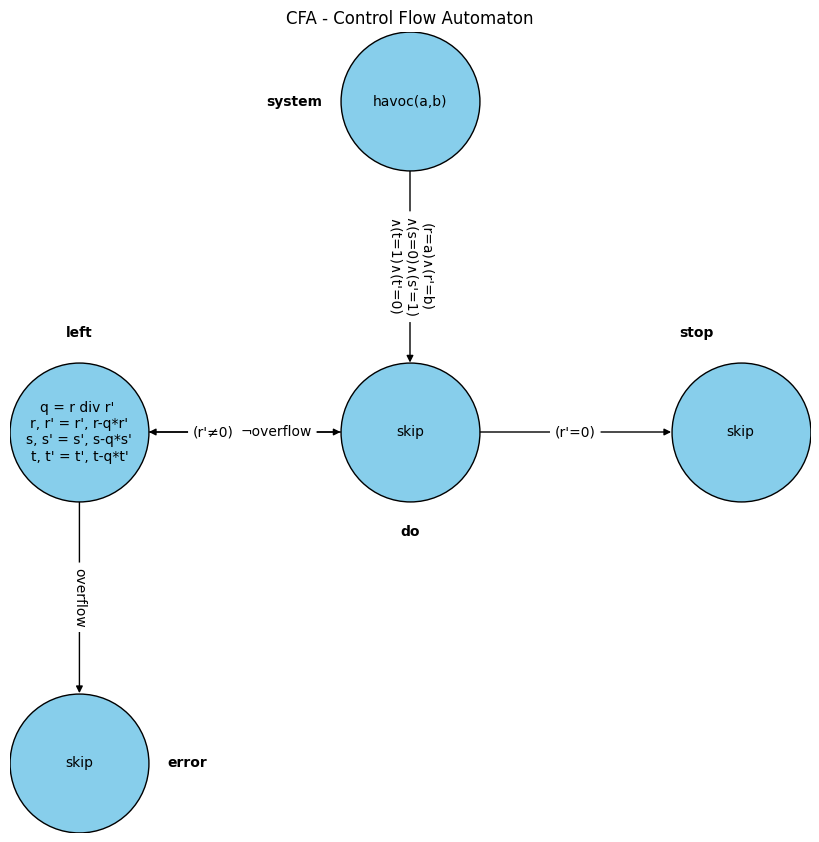

In [11]:
GOne = nx.DiGraph()

nodes = {
    "system": "havoc(a,b)",
    "do": "skip",
    "left": "q = r div r' \n"
            "r, r' = r', r-q*r'\n"
            "s, s' = s', s-q*s'\n"
            "t, t' = t', t-q*t'",
    "stop": "skip",
    "error": "skip",
}

for node, label in nodes.items():
    GOne.add_node(node, label=label)

edges = [
    ("system", "do", "(r=a)∧(r'=b)\n"
                     "∧(s=0)∧(s'=1)\n"
                     "∧(t=1)∧(t'=0)"),
    ("do", "left", "(r'≠0)"),
    ("do", "stop", "(r'=0)"),
    ("left", "do", "¬overflow"),
    ("left", "error", "overflow"),
]

for edge in edges:
    GOne.add_edge(edge[0], edge[1], label=edge[2])

# Node
pos = {
    "system": (-0.75, 2),
    "do": (-0.75, 1.5),
    "left": (-1.5, 1.5),
    "stop": (0, 1.5),
    "error": (-1.5, 1),
}

plt.figure(figsize=(8, 8))

nx.draw(
    GOne,
    pos,
    with_labels=False, # para não desenhar as labels
    node_shape="o",
    node_size=10000,
    node_color="skyblue",
    edgecolors="black",
    font_size=10,
)

# Desenhar as edge labels
edge_labels = nx.get_edge_attributes(GOne, "label")

edge_label_positions = {
    ("do", "left"): 0.6,
    ("left", "do"): 0.6,
}

for edge, label in edge_labels.items():
    nx.draw_networkx_edge_labels(
        GOne,
        pos,
        edge_labels={edge: label},
        font_size=10,
        font_color="black",
        label_pos=edge_label_positions.get(edge, 0.5),
    )

for node, (x, y) in pos.items():
    if node == "system":
        plt.text(
            x - 0.2, y,
            s=node,
            fontsize=10,
            fontweight="bold",
            horizontalalignment="right",
            verticalalignment="center",
        )
    elif node == "do":
        plt.text(
            x, y -0.15,
            s=node,
            fontsize=10,
            fontweight="bold",
            horizontalalignment="center",
            verticalalignment="center",
        )
    elif node == "stop":
        plt.text(
            x - 0.1, y + 0.15,
            s=node,
            fontsize=10,
            fontweight="bold",
            horizontalalignment="center",
            verticalalignment="center",
        )
    elif node == "left":
        plt.text(
            x, y + 0.15,  # Directly above the node
            s=node,
            fontsize=10,
            fontweight="bold",
            horizontalalignment="center",
            verticalalignment="center",
        )
    elif node == "error":
        plt.text(
            x + 0.2, y,  # Right of the node
            s=node,
            fontsize=10,
            fontweight="bold",
            horizontalalignment="left",
            verticalalignment="center",
        )

    # label principal
    plt.text(
        x, y,
        s=nodes[node],  # Main label
        fontsize=10,
        verticalalignment="center",
        horizontalalignment="center",
    )

plt.title("CFA - Control Flow Automaton")
plt.show()

<div class="alert alert-block alert-success">
    <b>
       Sistema de Equações <br>
    </b>
    <ul>
        <li>
            <b>System <br>
            <code> ⋀a,b. (r=a)∧(r_linha=b)∧(s=0)∧(s_linha=1)∧(t=1)∧(t_linha=0) </code>
        </li>
        <li>
            <b>Do <br>
            <code> (r_linha=0 -> stop)∧(r_linha!=0 -> left) </code> <br>
        </li>
        <li>
            <b>Left <br>
            <code> WPleft ((overflow -> error)∧(¬overflow -> do)) </code> <br>
        </li>
    </ul>
</div>

<div class="alert alert-block alert-success">
    <b>
        Local 1: <code>init</code> (Inicialização) <br>
        Estado inicial do programa onde as variáveis são atribuídas. <br>
    </b>
    <ul>
        <li>
            <b>Predicado de Pré-condição:</b> O programa assume que <code>a > 0</code> e <code>b > 0</code>, então o predicado que deve ser verdade antes de entrar neste estado é: <br>
            <code>Pré-condição: a > 0 ∧ b > 0</code>
        </li>
        <li>
            <b>Transformador de Predicado:</b> O programa define as variáveis no estado inicial: <br>
            <code>r = a, r' = b, s = 1, s' = 0, t = 0, t' = 1</code> <br>
            Ou seja, estamos a inicializar as variáveis conforme o algoritmo, sendo as variáveis <code>r, r', s, s', t, t'</code> configuradas.
        </li>
        <li>
            <b>Transição:</b> A partir deste estado, o programa segue para o local <code>skip</code>.
        </li>
    </ul>
</div>

<div class="alert alert-block alert-success">
    <b>
        Local 2: <code>skip</code> (Condição) <br>
        Local onde o programa verifica se a condição do <code>while</code> deve ser satisfeita para continuar. A condição do loop é <code>r' != 0</code>, o que determinará se o loop deve continuar ou se o programa deve parar.
    </b>
    <ul>
        <li>
            <b>Predicado de Pré-condição:</b> O estado anterior deve ter as variáveis <code>r', s, s', t</code> atualizadas. A condição que deve ser verdadeira aqui é: <br>
            <code>Pré-condição: r' ≠ 0</code>
        </li>
        <li>
            <b>Transformador de Predicado:</b> Quando <code>r' ≠ 0</code>, o programa pode executar uma iteração do loop. Caso contrário, ele terminará.
        </li>
        <li>
            <b>Transição (Switch):</b>
            <ul>
                <li><b>Ramo 1 (continuação do loop):</b> Se <code>r' ≠ 0</code>, a transição vai para o local <code>left</code> para atualizar as variáveis.</li>
                <li><b>Ramo 2 (parada do programa):</b> Se <code>r' = 0</code>, o programa termina no local <code>stop</code>.</li>
            </ul>
        </li>
    </ul>
</div>

<div class="alert alert-block alert-success">
    <b>
        Local 3: <code>left</code> (Execução do Corpo do Loop) <br>
        Este local é onde o corpo do loop é executado: calcula-se o quociente <code>q</code> e, em seguida, as variáveis <code>r, r', s, s', t, t'</code> são atualizadas.
    </b>
    <ul>
        <li>
            <b>Predicado de Pré-condição:</b> O local <code>left</code> é acessado se a condição <code>r' ≠ 0</code> for verdadeira no local anterior (<code>skip</code>). Portanto, a pré-condição aqui é: <br>
            <code>Pré-condição: r' ≠ 0</code>
        </li>
        <li>
            <b>Transformador de Predicado:</b> O corpo do loop executa as seguintes transformações nas variáveis:
            <ul>
                <li><code>q = r div r'</code></li>
                <li><code>r' = r, r' = r - q × r'</code></li>
                <li><code>s' = s, s' = s - q × s'</code></li>
                <li><code>t' = t, t' = t - q × t'</code></li>
            </ul>
        </li>
        <li>
            <b>Transição:</b> Após a execução do corpo do loop, o programa volta ao local <code>skip</code> para verificar novamente a condição <code>r' ≠ 0</code>. Isso ocorre até que <code>r' = 0</code>.
        </li>
        <li>
            <b>Ramo de erro:</b> Caso ocorra um overflow ou erro de cálculo, o programa transita para o local <code>error</code>.
        </li>
    </ul>
</div>

<div class="alert alert-block alert-success">
    <b>
        Local 4: <code>stop</code> (Fim do Programa) <br>
        Estado final, onde o programa termina quando <code>r' = 0</code>.
    </b>
    <ul>
        <li>
            <b>Predicado de Pré-condição:</b> O programa chega a este estado se a condição <code>r' = 0</code> for verdadeira no local <code>skip</code>. A pré-condição para este local é: <br>
            <code>Pré-condição: r' = 0</code>
        </li>
        <li>
            <b>Transformador de Predicado:</b> O valor de <code>r</code> agora representa o <b>máximo divisor comum</b> (MDC) entre os valores iniciais <code>a</code> e <code>b</code>. O programa termina com a saída de <code>r, s, t</code>.
        </li>
        <li>
            <b>Transição:</b> O programa termina neste estado.
        </li>
    </ul>
</div>

<div class="alert alert-block alert-success">
    <b>
        Local 5: <code>error</code> (Erro) <br>
        Este local ocorre quando há um erro, como um **overflow** ou outra falha, durante a execução do programa.
    </b>
    <ul>
        <li>
            <b>Predicado de Pré-condição:</b> O predicado para transitar para o local de erro é um **overflow** ou falha na execução de um cálculo. A pré-condição para este local é: <br>
            <code>Pré-condição: overflow ou erro de cálculo</code>
        </li>
        <li>
            <b>Transformador de Predicado:</b> O programa para imediatamente, sem produzir um valor correto para <code>r</code>, <code>s</code> e <code>t</code>. O estado de erro indica que algo deu errado durante a execução do algoritmo.
        </li>
        <li>
            <b>Transição:</b> O programa termina no estado de erro.
        </li>
    </ul>
</div>


### Alinea b) -> 1ª Implementação

In [12]:
def wp_safety(val_a, val_b, n):
    with Solver(name="z3") as solver:

        print(f"> A testar o caso a={val_a}, b={val_b}...")

        r = Symbol("r", INT)
        r_linha = Symbol("r_linha", INT)
        s = Symbol("s", INT)
        s_linha = Symbol("s_linha", INT)
        t = Symbol("t", INT)
        t_linha = Symbol("t_linha", INT)

        stop = FALSE()
        error = TRUE()

        do = FALSE()

        first = And(
            Equals(r, Int(val_a)),
            Equals(r_linha, Int(val_b)),
            r > Int(0),
            r_linha > Int(0),
            Equals(s, Int(1)),
            Equals(s_linha, Int(0)),
            Equals(t, Int(0)),
            Equals(t_linha, Int(1)),

        )

        print(f"> Precondition: {first}")

        for i in range(n):

            system = And(first, do)
            if solver.is_sat(system):
                print(f"> Iteration {i}: The system is unsafe.")
                return

            q = Div(r, r_linha)

            atrib = substitute(do, {
                        r: r_linha,
                        r_linha: r - q * r_linha,
                        s : s_linha,
                        s_linha: s - q * s_linha,
                        t: t_linha,
                        t_linha: t - q * t_linha,
            })

            print(
                f"> Iteration {i}: q = {q}, r = {r}, r_linha = {r_linha}, "
                f"s = {s}, s_linha = {s_linha}, t = {t}, t_linha = {t_linha}"
            )

            new_do = And(
                Implies(r_linha.Equals(Int(0)), stop),
                Implies(Not(Equals(r_linha, Int(0))), atrib)
            )

            do = Or(new_do, do)


        print(f"> The program is safe for {n} iterations.")


wp_safety(60, 27, 10)

> A testar o caso a=60, b=27...
> Precondition: ((r = 60) & (r_linha = 27) & (0 < r) & (0 < r_linha) & (s = 1) & (s_linha = 0) & (t = 0) & (t_linha = 1))
> Iteration 0: q = (r / r_linha), r = r, r_linha = r_linha, s = s, s_linha = s_linha, t = t, t_linha = t_linha
> Iteration 1: q = (r / r_linha), r = r, r_linha = r_linha, s = s, s_linha = s_linha, t = t, t_linha = t_linha
> Iteration 2: q = (r / r_linha), r = r, r_linha = r_linha, s = s, s_linha = s_linha, t = t, t_linha = t_linha
> Iteration 3: q = (r / r_linha), r = r, r_linha = r_linha, s = s, s_linha = s_linha, t = t, t_linha = t_linha
> Iteration 4: q = (r / r_linha), r = r, r_linha = r_linha, s = s, s_linha = s_linha, t = t, t_linha = t_linha
> Iteration 5: q = (r / r_linha), r = r, r_linha = r_linha, s = s, s_linha = s_linha, t = t, t_linha = t_linha
> Iteration 6: q = (r / r_linha), r = r, r_linha = r_linha, s = s, s_linha = s_linha, t = t, t_linha = t_linha
> Iteration 7: q = (r / r_linha), r = r, r_linha = r_linha, s = s, s_

### Alinea b) -> 2ª Implementação

----

### Versão com Grafo NetWorkX

In [17]:
GTwo = nx.DiGraph()

a = Symbol("a", INT)
b = Symbol("b", INT)
q = Symbol("q", INT)
r = Symbol("r", INT)
r_linha = Symbol("r_linha", INT)
s = Symbol("s", INT)
s_linha = Symbol("s_linha", INT)
t = Symbol("t", INT)
t_linha = Symbol("t_linha", INT)

nodes = {
    "system": "havoc(a,b)",
    "do": "skip",
    "left": {
                q: Div(r, r_linha),
                r: r_linha,
                r_linha: Minus(r, Times(q, r_linha)),
                s: s_linha,
                s_linha: Minus(s, Times(q, s_linha)),
                t: t_linha,
                t_linha: Minus(t, Times(q, t_linha)),
            },
    "stop": "skip",
    "error": "skip",
}

for node, label in nodes.items():
    GTwo.add_node(node, label=label)

edges = [
    ("system", "do", And(
                        Equals(r, a),
                        Equals(r_linha, b),
                        Equals(s, Int(0)),
                        Equals(s_linha, Int(1)),
                        Equals(t, Int(1)),
                        Equals(t_linha, Int(0))
                     )),
    ("do", "left", Not(Equals(r, Int(0)))),
    ("do", "stop", Equals(r, Int(0))),
    ("left", "do", "¬overflow"),
    ("left", "error", "overflow"),
]

for edge in edges:
    GTwo.add_edge(edge[0], edge[1], label=edge[2])

def wp_safety2(G, n):
    with Solver(name="z3") as solver:

        r = Symbol("r", INT)
        r_linha = Symbol("r_linha", INT)
        s = Symbol("s", INT)
        s_linha = Symbol("s_linha", INT)
        t = Symbol("t", INT)
        t_linha = Symbol("t_linha", INT)

        stop = FALSE()
        error = TRUE()

        do = FALSE()

        for source, target, data in G.edges(data=True):
            if source == "system" and target == "do":
                first = data["label"]
                # print(first)
                break

        for i in range(n):

            system =  And(first, do)
            if solver.is_sat(system):
                print(f"> Iteration {i}: The system is unsafe.")
                return

            clauses = []
            for source, target, data in G.edges(data=True):
                if source == "do":
                    label = data["label"]
                    if target == "stop":
                        clauses.append(Implies(label, stop))
                    else:
                        sub = G.nodes[target]["label"]
                        atrib = substitute(do, sub)
                        clauses.append(Implies(label, atrib))

            new_do = And(clauses)

            R = And(do, Not(new_do))
            L = And(do, Not(new_do))
            if solver.is_sat(Or(R, L)):
                print(f"> Iteration {i}: The system is safe.")
                return

            do = Or(new_do, do)

            print(
                f"> Iteration {i}: q = {q}, r = {r}, r_linha = {r_linha}, "
                f"s = {s}, s_linha = {s_linha}, t = {t}, t_linha = {t_linha}"
            )

        print(f"> The program is safe for {n} iterations.")


wp_safety2(GTwo, 10)


> Iteration 0: q = q, r = r, r_linha = r_linha, s = s, s_linha = s_linha, t = t, t_linha = t_linha
> Iteration 1: q = q, r = r, r_linha = r_linha, s = s, s_linha = s_linha, t = t, t_linha = t_linha
> Iteration 2: q = q, r = r, r_linha = r_linha, s = s, s_linha = s_linha, t = t, t_linha = t_linha
> Iteration 3: q = q, r = r, r_linha = r_linha, s = s, s_linha = s_linha, t = t, t_linha = t_linha
> Iteration 4: q = q, r = r, r_linha = r_linha, s = s, s_linha = s_linha, t = t, t_linha = t_linha
> Iteration 5: q = q, r = r, r_linha = r_linha, s = s, s_linha = s_linha, t = t, t_linha = t_linha
> Iteration 6: q = q, r = r, r_linha = r_linha, s = s, s_linha = s_linha, t = t, t_linha = t_linha
> Iteration 7: q = q, r = r, r_linha = r_linha, s = s, s_linha = s_linha, t = t, t_linha = t_linha
> Iteration 8: q = q, r = r, r_linha = r_linha, s = s, s_linha = s_linha, t = t, t_linha = t_linha
> Iteration 9: q = q, r = r, r_linha = r_linha, s = s, s_linha = s_linha, t = t, t_linha = t_linha
> The prog